In [1]:
import tqdm
import mlmi
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('ticks')

In [2]:
amis = []
tmis = []

for c in tqdm.tqdm(np.arange(0, 0.5, 0.1)):
    cov = np.array([[1, c], [c, 1]])
    data = scipy.stats.multivariate_normal(mean=[0, 0], cov=cov).rvs(3000)
    ami = mlmi.mutual_information(data, 200)
    tmi = 0.5 * (np.sum(np.log(np.diag(cov))) - np.log(np.linalg.det(cov)))
    amis += [ami]
    tmis += [tmi]

100%|██████████| 5/5 [00:21<00:00,  4.43s/it]


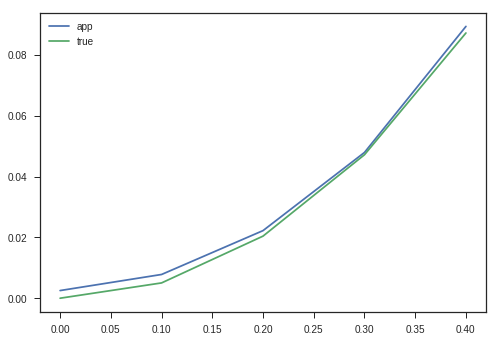

In [3]:
plt.plot(np.arange(0, 0.5, 0.1), amis, label='app')
plt.plot(np.arange(0, 0.5, 0.1), tmis, label='true')
plt.legend()